In [24]:
import pandas as pd

df = pd.read_csv('drones_large_10000.csv')
df.head()


,patent_id,title,application_date,applicant_country,inventor_names,assignee_organization
0,CN456789D,Battery-efficient drone propulsion,2019-07-21,China,Bob Johnson; Carla Brown,DroneTech Inc
1,EP345678C,High-speed drone communication protocol,2021-06-30,Japan,Bob Johnson; Carla Brown,Beijing Aero
2,US123456A,Quadcopter navigation algorithm,2022-11-12,Japan,Dieter Schmidt; Emma Lange,Nippon Robotics
3,EP345678C,Drone delivery system,2018-05-10,Japan,Hiro Tanaka; Kenji Sato,Beijing Aero
4,US123456A,Quadcopter navigation algorithm,2020-03-15,China,Fang Li; Wei Zhang,DroneTech Inc


In [20]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patent_id              10000 non-null  object
 1   title                  10000 non-null  object
 2   application_date       10000 non-null  object
 3   applicant_country      10000 non-null  object
 4   inventor_names         10000 non-null  object
 5   assignee_organization  10000 non-null  object
 6   application_year       10000 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 507.9+ KB


patent_id                0
title                    0
application_date         0
applicant_country        0
inventor_names           0
assignee_organization    0
application_year         0
dtype: int64

In [25]:
df['application_year'] = pd.to_datetime(df['application_date']).dt.year


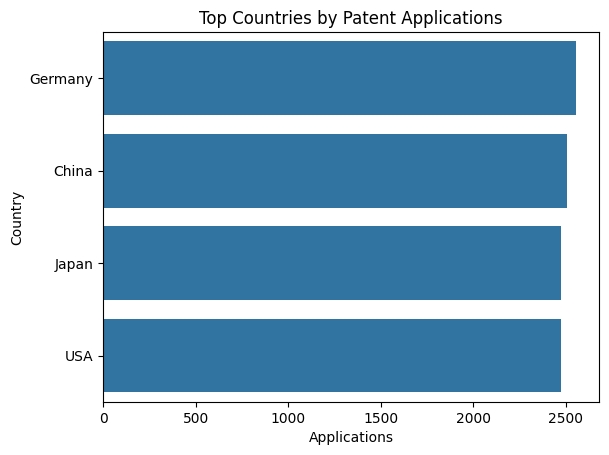

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['applicant_country'].value_counts()
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top Countries by Patent Applications')
plt.xlabel('Applications')
plt.ylabel('Country')
plt.show()


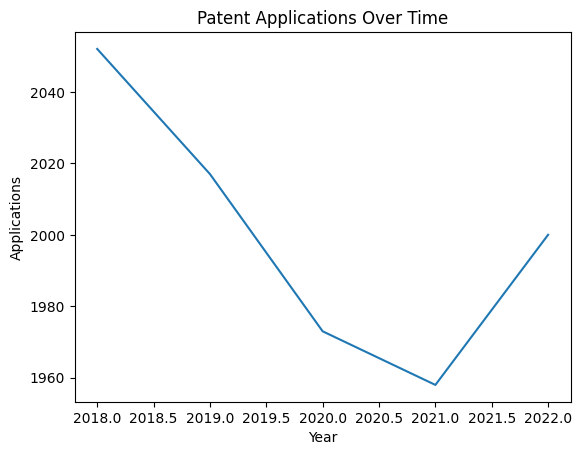

In [27]:
yearly = df['application_year'].value_counts().sort_index()
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title('Patent Applications Over Time')
plt.xlabel('Year')
plt.ylabel('Applications')
plt.show()


In [28]:
import networkx as nx

G = nx.Graph()

for _, row in df.iterrows():
    inventors = row['inventor_names'].split(';')
    for i in range(len(inventors)):
        for j in range(i + 1, len(inventors)):
            G.add_edge(inventors[i].strip(), inventors[j].strip())

print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")


Total Nodes: 9
Total Edges: 5


In [29]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 Inventors by Degree Centrality:")
for name, centrality in sorted_degree[:5]:
    print(f"{name}: {centrality:.4f}")


Top 5 Inventors by Degree Centrality:
Bob Johnson: 0.2500
Carla Brown: 0.1250
Dieter Schmidt: 0.1250
Emma Lange: 0.1250
Hiro Tanaka: 0.1250


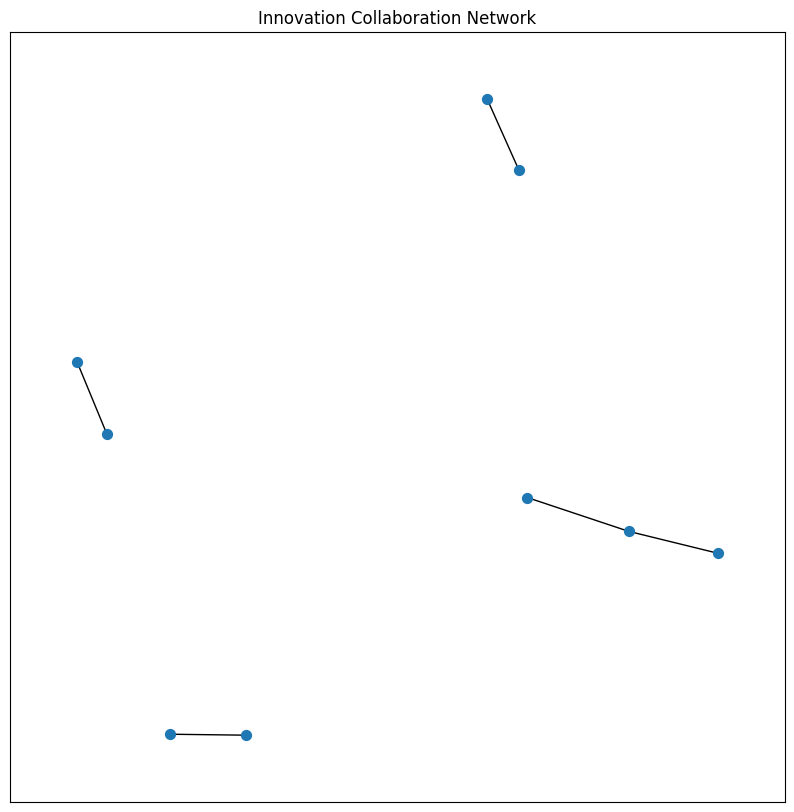

In [30]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, node_size=50, font_size=8, with_labels=False)
plt.title("Innovation Collaboration Network")
plt.show()
